# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_com_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
mouse_study_com_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [199]:
# Checking the number of mice.
len(mouse_study_com_df["Mouse ID"].unique())

249

In [200]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_com_df.head(5)
mouse_study_com_duplciate=mouse_study_com_df
mouse_study_com_duplciate["UniqueKey"]=mouse_study_com_duplciate.apply(lambda x:'%s_%s' % (x['Mouse ID'],x['Timepoint']),axis=1)
mouse_study_com_duplciate = mouse_study_com_duplciate[mouse_study_com_duplciate.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

mouse_study_com_duplciate.head(6)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UniqueKey
107,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
137,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
329,g989,5,48.786801,0,Propriva,Female,21,26,g989_5
360,g989,5,47.570392,0,Propriva,Female,21,26,g989_5
620,g989,10,51.745156,0,Propriva,Female,21,26,g989_10
681,g989,10,49.880528,0,Propriva,Female,21,26,g989_10


In [201]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_com_duplciate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UniqueKey
107,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
137,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
329,g989,5,48.786801,0,Propriva,Female,21,26,g989_5
360,g989,5,47.570392,0,Propriva,Female,21,26,g989_5
620,g989,10,51.745156,0,Propriva,Female,21,26,g989_10
681,g989,10,49.880528,0,Propriva,Female,21,26,g989_10
815,g989,15,51.325852,1,Propriva,Female,21,26,g989_15
869,g989,15,53.442020,0,Propriva,Female,21,26,g989_15
950,g989,20,55.326122,1,Propriva,Female,21,26,g989_20
1111,g989,20,54.657650,1,Propriva,Female,21,26,g989_20


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df=mouse_study_com_df
clean_mouse_df = mouse_study_com_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')








In [203]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()


249

## Summary Statistics

In [204]:
clean_mouse_df.shape

(1888, 9)

In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Groupby_DF=clean_mouse_df.groupby("Drug Regimen")
Mean=Groupby_DF["Tumor Volume (mm3)"].mean()
Median=Groupby_DF["Tumor Volume (mm3)"].median()
Var=Groupby_DF["Tumor Volume (mm3)"].var()
Std=Groupby_DF["Tumor Volume (mm3)"].std()
Sem=Groupby_DF["Tumor Volume (mm3)"].sem()

mean_median=pd.merge(Mean,Median,on='Drug Regimen')
mean_median
mean_median_var=pd.merge(mean_median,Var,on='Drug Regimen')
mean_median_var=mean_median_var.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume','Tumor Volume (mm3)_y':'Median Tumor Volume','Tumor Volume (mm3)':'Tumor Volume Variance'})
mean_median_var

mean_median_var_std=pd.merge(mean_median_var,Std,on='Drug Regimen')
mean_median_var_std_sem=pd.merge(mean_median_var_std,Sem,on='Drug Regimen')
mean_median_var_std_sem
resulting_series=mean_median_var_std_sem.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Std. Dev.','Tumor Volume (mm3)_y':'Tumor Volume Std. Err.'})
resulting_series

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [207]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_one_line = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', median='median', var='var', std='std', sem='sem')


summary_stats_one_line



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mourse TImepoints'>

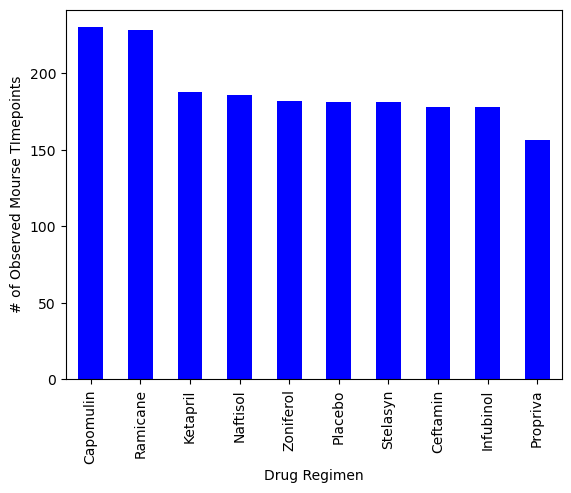

In [208]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Filter_Graph=Groupby_DF["Drug Regimen"].count().sort_values(ascending=False)
Filter_Graph.plot(kind="bar",color="blue",xlabel="Drug Regimen",ylabel="# of Observed Mourse TImepoints")

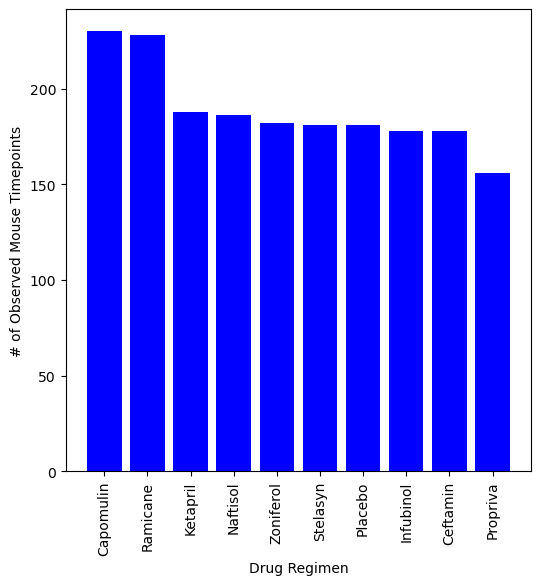

In [222]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Filter_Graph.index

Filter_Graph_Plt = clean_mouse_df['Drug Regimen'].value_counts()

# Extract the drug regimens and corresponding counts
regimens = Filter_Graph_Plt.index
counts = Filter_Graph_Plt.values

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(regimens, counts, color='blue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)


# Show plot
plt.show()


<Axes: title={'center': 'Distribution of Mice by Sex'}, ylabel='Sex'>

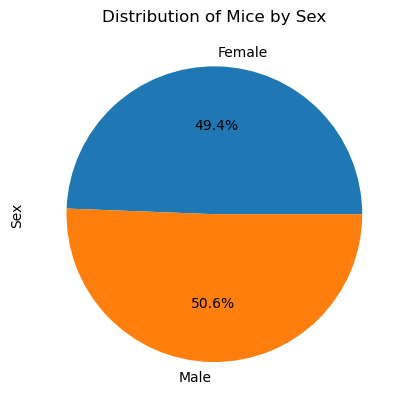

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


sex_group=mouse_study_com_df.groupby("Sex").count()
sex_group["Mouse ID"].plot(kind="pie",ylabel="Sex",
autopct='%1.1f%%', title="Distribution of Mice by Sex")


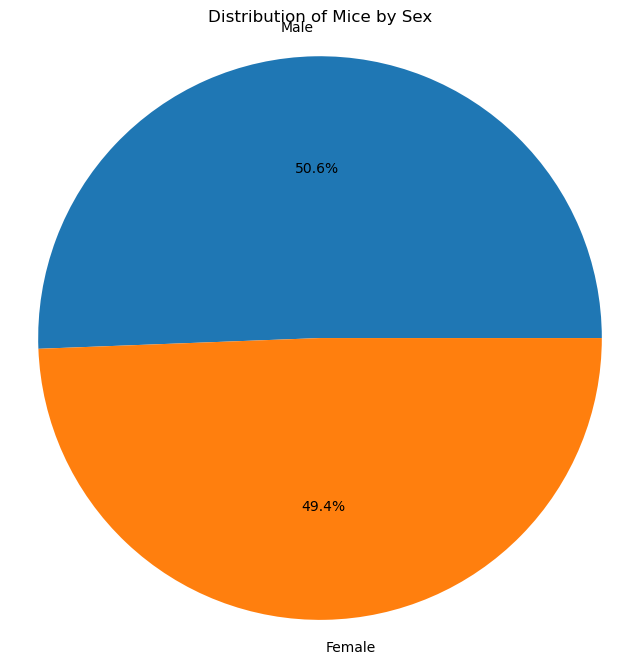

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by "Sex" and count the occurrences of "Mouse ID"
sex_counts = mouse_study_com_df['Sex'].value_counts()

# Plot the pie chart for the distribution of mice by sex using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=360)
plt.title("Distribution of Mice by Sex")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume=mouse_study_com_df.groupby("Drug Regimen")
final_tumor_volume_updated=final_tumor_volume["Tumor Volume (mm3)"].sum()
final_tumor_volume_updated.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
Updated_result=final_tumor_volume_updated.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
Updated_result
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Drug Regimen
Capomulin    9355.420462
Ramicane     9169.417875
Infubinol    9413.493529
Ceftamin     9361.228582
Name: Tumor Volume (mm3), dtype: float64

In [214]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [216]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [217]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [218]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
